<a href="https://colab.research.google.com/github/IngErnestoAlvarez/terremoto_research/blob/main/cant_de_pisos_vs_altura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

%matplotlib inline

# haciendo los graficos un poco mas bonitos en matplotlib
plt.style.use('default') 
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

# suprimimos la notacion cientifica en los outputs
pd.options.display.float_format = '{:20,.2f}'.format 

import warnings
warnings.filterwarnings('ignore')

In [2]:
values = pd.read_csv("train_values.csv", usecols={'building_id':'int64', 'count_floors_pre_eq':'int64', 'height_percentage':'int64'})
values.head(5)

,building_id,count_floors_pre_eq,height_percentage
0,802906,2,5
1,28830,2,7
2,94947,2,5
3,590882,2,5
4,201944,3,9


In [3]:
labels = pd.read_csv("train_labels.csv")
labels.head(5)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [4]:
cantidad_de_pisos_altura_y_danio = values.merge(labels, how='inner')
cantidad_de_pisos_altura_y_danio.head(5)

,building_id,count_floors_pre_eq,height_percentage,damage_grade
0,802906,2,5,3
1,28830,2,7,2
2,94947,2,5,3
3,590882,2,5,2
4,201944,3,9,3


In [5]:
cant_de_pisos_vs_altura = cantidad_de_pisos_altura_y_danio.drop(columns=['building_id'])
cant_de_pisos_vs_altura



,count_floors_pre_eq,height_percentage,damage_grade
0,2,5,3
1,2,7,2
2,2,5,3
3,2,5,2
4,3,9,3
...,...,...,...
260596,1,3,2
260597,2,5,3
260598,3,7,3
260599,2,6,2


In [16]:
nombre = {'damage_grade' : {1:'leve', 2:'moderado', 3:'total'}}
cant_de_pisos_vs_altura = cant_de_pisos_vs_altura.replace(nombre)
cant_de_pisos_vs_altura

,count_floors_pre_eq,height_percentage,damage_grade
0,2,5,total
1,2,7,moderado
2,2,5,total
3,2,5,moderado
4,3,9,total
...,...,...,...
260596,1,3,moderado
260597,2,5,total
260598,3,7,total
260599,2,6,moderado


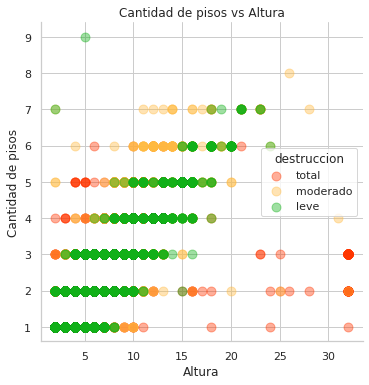

In [18]:
sns.lmplot(x='height_percentage', y='count_floors_pre_eq',fit_reg=False, legend=False, data=cant_de_pisos_vs_altura, 
           hue='damage_grade', hue_order=['total','moderado','leve'], size=5, scatter_kws={"alpha":0.4,"s":80},
           palette={'leve':'#11b018', 'moderado':'#ffbb42', 'total':'#ff3600'},
           )
plt.legend(loc='lower_right', title="destruccion")
plt.title("Cantidad de pisos vs Altura")
plt.xlabel("Altura")
plt.ylabel("Cantidad de pisos")
plt.show()